<a href="https://colab.research.google.com/github/kmeiyalagan/kmeiyalagan/blob/main/Regression_Class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### DATA PREPROCESSING

##### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Import Dataset

In [3]:
dataset = pd.read_excel('/content/DATA.xlsx')
dataset

,Age,Salary,Country,Purchased
0,23.0,20000.0,France,Yes
1,24.0,30000.0,Germany,No
2,25.0,40000.0,Spain,No
3,NaN,35000.0,France,Yes
4,41.0,NaN,Germany,No
5,43.0,42000.0,Spain,No
6,44.0,44000.0,France,Yes


In [4]:
X = dataset.iloc[:,0:3].values
X

array([[23.0, 20000.0, 'France'],
       [24.0, 30000.0, 'Germany'],
       [25.0, 40000.0, 'Spain'],
       [nan, 35000.0, 'France'],
       [41.0, nan, 'Germany'],
       [43.0, 42000.0, 'Spain'],
       [44.0, 44000.0, 'France']], dtype=object)

In [5]:
y = dataset[['Purchased']].values
y

array([['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes']], dtype=object)

##### Taking care of missing values

In [6]:
dataset.isnull().sum()

Age          1
Salary       1
Country      0
Purchased    0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer.fit(X[:,0:2])
X[:,0:2] = imputer.transform(X[:,0:2])

In [8]:
print(X)

[[23.0 20000.0 'France']
 [24.0 30000.0 'Germany']
 [25.0 40000.0 'Spain']
 [33.333333333333336 35000.0 'France']
 [41.0 35166.666666666664 'Germany']
 [43.0 42000.0 'Spain']
 [44.0 44000.0 'France']]


##### Encoding

In [9]:
# Encoding the independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 23.0, 20000.0],
       [0.0, 1.0, 0.0, 24.0, 30000.0],
       [0.0, 0.0, 1.0, 25.0, 40000.0],
       [1.0, 0.0, 0.0, 33.333333333333336, 35000.0],
       [0.0, 1.0, 0.0, 41.0, 35166.666666666664],
       [0.0, 0.0, 1.0, 43.0, 42000.0],
       [1.0, 0.0, 0.0, 44.0, 44000.0]], dtype=object)

In [10]:
# Encoding of Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 1, 0, 0, 1])

##### Spitting the Data


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

In [18]:
X_train

array([[0.0, 0.0, 1.0, 43.0, 42000.0],
       [1.0, 0.0, 0.0, 33.333333333333336, 35000.0],
       [0.0, 1.0, 0.0, 24.0, 30000.0],
       [1.0, 0.0, 0.0, 23.0, 20000.0],
       [0.0, 0.0, 1.0, 25.0, 40000.0]], dtype=object)

In [19]:
X_test

array([[0.0, 1.0, 0.0, 41.0, 35166.666666666664],
       [1.0, 0.0, 0.0, 44.0, 44000.0]], dtype=object)

In [20]:
y_train

array([0, 1, 0, 1, 0])

In [21]:
y_test

array([0, 1])

##### Feature Scaling

In [22]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.fit_transform(X_test[:,3:])

In [23]:
X_train

array([[0.0, 0.0, 1.0, 1.752095554888843, 1.0900932721112968],
       [1.0, 0.0, 0.0, 0.48182627759443203, 0.20280805062535753],
       [0.0, 1.0, 0.0, -0.7446406108277585, -0.4309671075788848],
       [1.0, 0.0, 0.0, -0.8760477774444217, -1.6985174239873695],
       [0.0, 0.0, 1.0, -0.6132334442110953, 0.8365832088295998]],
      dtype=object)

In [24]:
X_test

array([[0.0, 1.0, 0.0, -1.0, -0.9999999999999992],
       [1.0, 0.0, 0.0, 1.0, 1.0000000000000009]], dtype=object)

In [25]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train[:,3:] = mm.fit_transform(X_train[:,3:])
X_test[:,3:] = mm.fit_transform(X_test[:,3:])

In [26]:
X_train

array([[0.0, 0.0, 1.0, 1.0, 1.0],
       [1.0, 0.0, 0.0, 0.5166666666666668, 0.6818181818181819],
       [0.0, 1.0, 0.0, 0.050000000000000044, 0.4545454545454546],
       [1.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, 0.1, 0.9090909090909092]], dtype=object)

In [27]:
X_test

array([[0.0, 1.0, 0.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 1.0]], dtype=object)

#### SIMPLE LINEAR REGRESSION

##### Data Preprocessing

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X = dataset[['YearsExperience']].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y = dataset[['Salary']].values
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [ ]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

In [ ]:
X_train

array([[ 4.1],
       [ 1.5],
       [ 5.1],
       [ 1.3],
       [ 5.3],
       [ 9.6],
       [ 3.2],
       [ 4. ],
       [ 2.2],
       [ 8.2],
       [ 3. ],
       [ 6.8],
       [ 3.7],
       [ 4. ],
       [10.5],
       [ 6. ],
       [ 7.1],
       [ 1.1],
       [ 3.2],
       [10.3],
       [ 2. ],
       [ 9. ],
       [ 8.7],
       [ 3.9]])

In [ ]:
X_test

array([[4.9],
       [2.9],
       [7.9],
       [9.5],
       [5.9],
       [4.5]])

##### Fiiting the Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

###### Predicting the result on the Test Data

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 72348.74519846],
       [ 53511.61125108],
       [100604.44611953],
       [115674.15327744],
       [ 81767.31217215],
       [ 68581.31840899]])

In [ ]:
y_test

array([[ 67938.],
       [ 56642.],
       [101302.],
       [116969.],
       [ 81363.],
       [ 61111.]])

##### Visualization

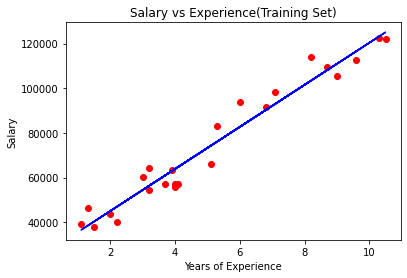

In [ ]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, regressor.predict(X_train),color = 'blue')
plt.title('Salary vs Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

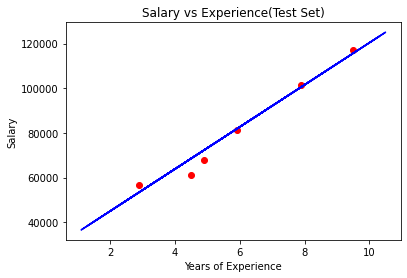

In [ ]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train, regressor.predict(X_train),color = 'blue')
plt.title('Salary vs Experience(Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### MULTIPLE LINEAR REGRESSION

##### Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = dataset.iloc[:,0:4].values
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [ ]:
y = dataset[['Profit']].values
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [ ]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# Encoding the independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)

In [ ]:
y_test

array([[141585.52],
       [ 81005.76],
       [149759.96],
       [ 42559.73],
       [ 97483.56],
       [103282.38],
       [134307.35],
       [ 35673.41],
       [ 64926.08],
       [156122.51]])

##### Fitting the Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

###### Predicting the Test Set Result

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[127945.43 141585.52]
 [ 86145.08  81005.76]
 [156693.62 149759.96]
 [ 45896.08  42559.73]
 [ 95847.17  97483.56]
 [ 97280.79 103282.38]
 [127382.43 134307.35]
 [ 52651.8   35673.41]
 [ 46827.32  64926.08]
 [158637.11 156122.51]]


##### Mean Squared Error and Roor Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
round(mean_squared_error(y_test, y_pred),2)

98047662.34

In [ ]:
import math
math.sqrt(round(mean_squared_error(y_test, y_pred),2)) #This is a metric to check the accuracy of Regression Model

9901.90195568508

#### POLYNOMIAL REGRESSION MODEL

##### Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = dataset[['Level']].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y = dataset[['Salary']].values
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [ ]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

##### Fitting the Model

In [ ]:
#Linear Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
# Polynomial Linear Model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [ ]:
pd.DataFrame(X_poly)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


##### Visualization

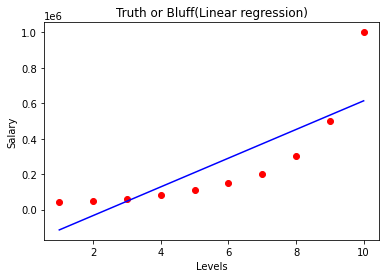

In [ ]:
# With Linear Model
plt.scatter(X,y,color = 'red')
plt.plot(X, lin_reg.predict(X),color = 'blue')
plt.title('Truth or Bluff(Linear regression)')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

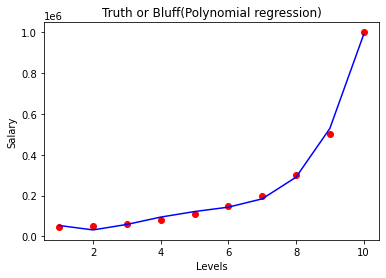

In [ ]:
# With Polynomial Model
plt.scatter(X,y,color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),color = 'blue')
plt.title('Truth or Bluff(Polynomial regression)')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

##### Prediction

In [ ]:
lin_reg.predict([[6.5]])

array([[330378.79]])

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([[158862.45]])